In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df = df.drop(["Serial No."], axis = 1)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### No missing data

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


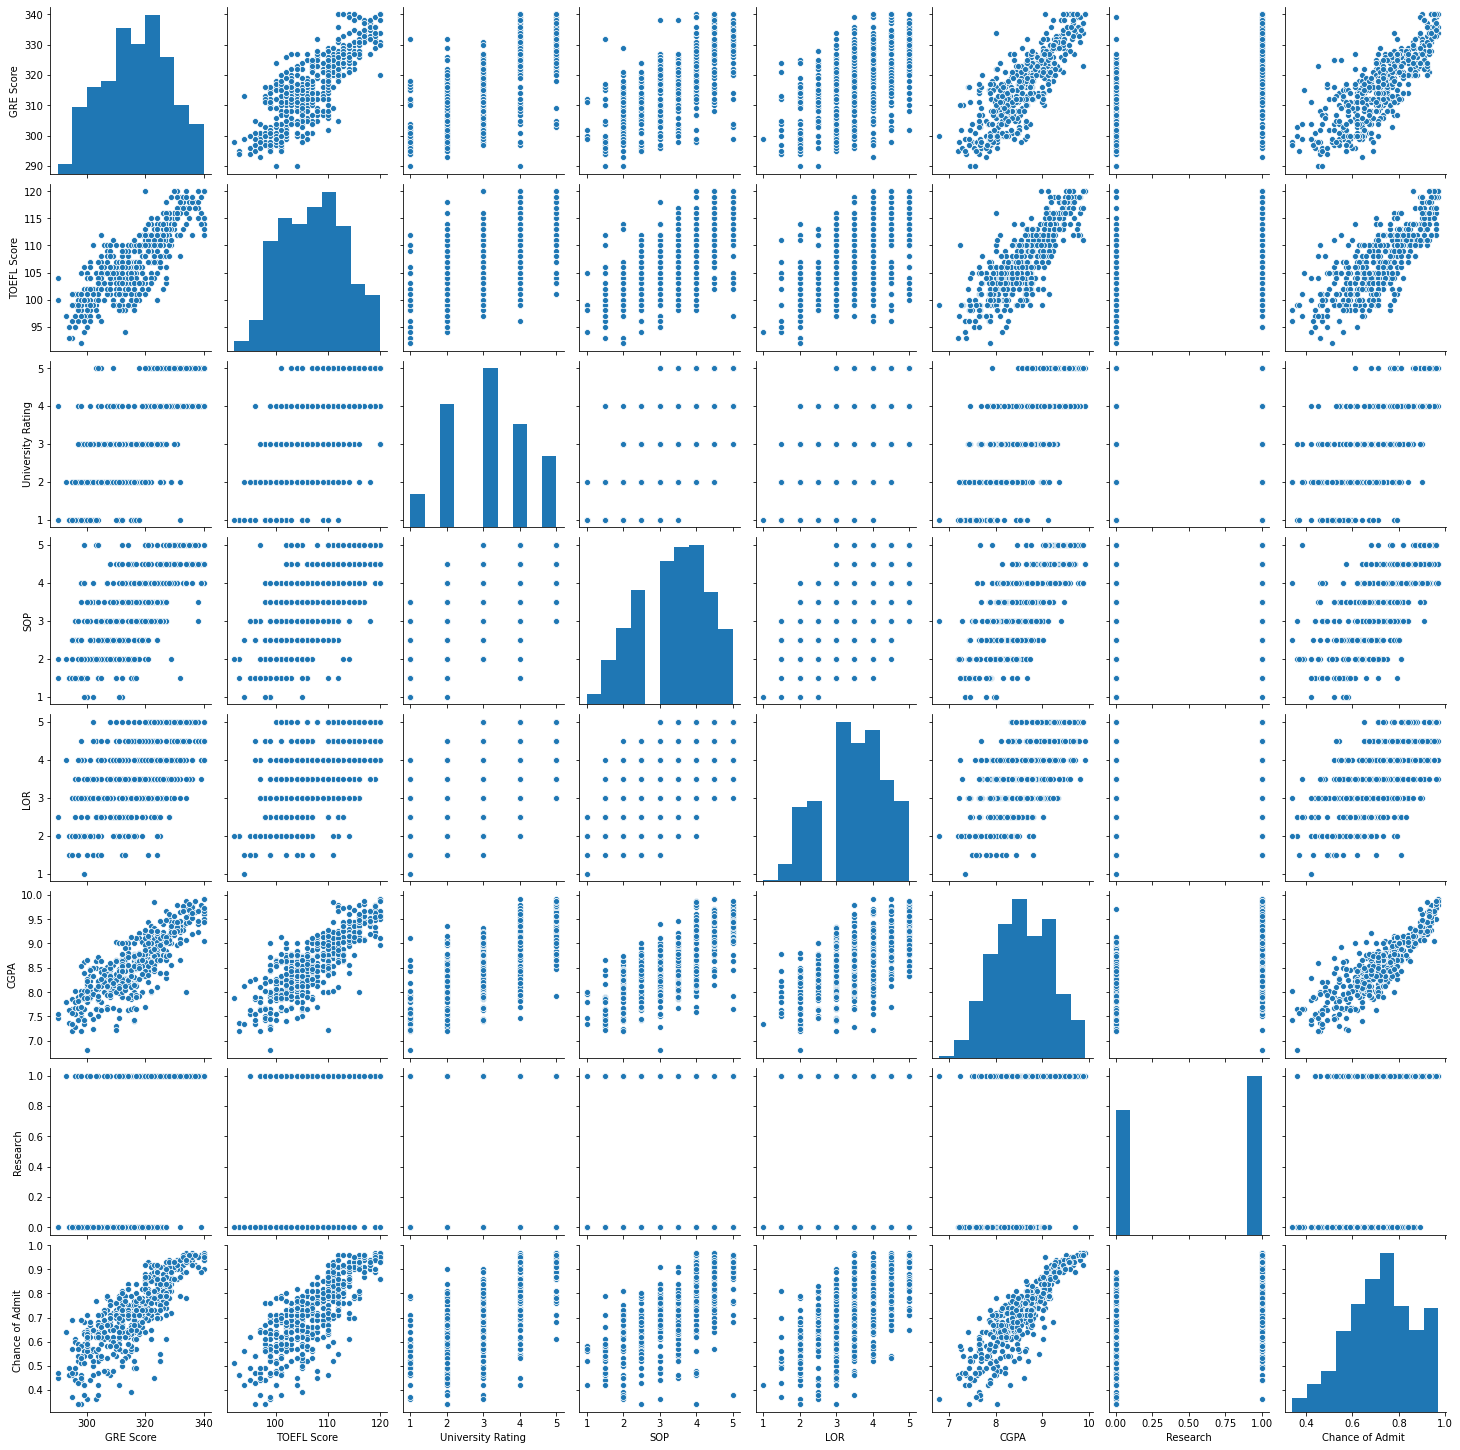

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


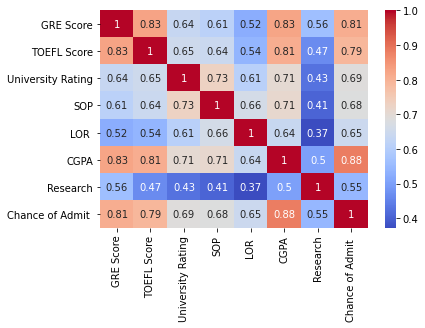

In [10]:
# checking the correlation between all the features 
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### from the corr, we can see that the chance of admission depends on all the features as they all have strong positive correlation with the target variable, but CGPA feature has more correlation. Therefore, we will  not be dropping any of the features

### ...
### ....

### To check each of the features and see how they are distributed

In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

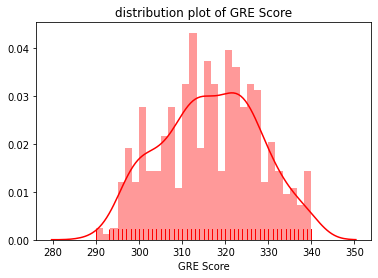

In [12]:
# distribution plot of GRE Score
plt.title("distribution plot of GRE Score")
sns.distplot(df["GRE Score"], bins = 30, color = "r", rug = True )


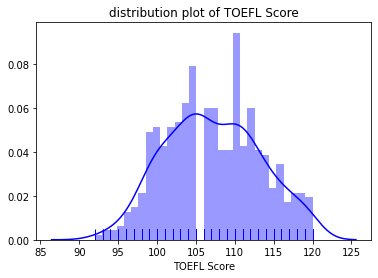

In [13]:
# distribution plot of TOEFL Score

plt.title("distribution plot of TOEFL Score")
sns.distplot(df["TOEFL Score"], bins = 30, color = "b", rug = True )

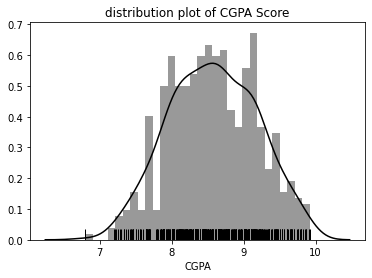

In [14]:
# distribution plot of CGPA Score

plt.title("distribution plot of CGPA Score")
sns.distplot(df["CGPA"], bins = 30, color = "k", rug = True )

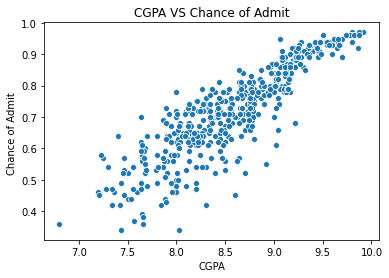

In [15]:
# A scatter plot to show the relationship between the CGPA and the chances of getting admission

plt.title("CGPA VS Chance of Admit")
sns.scatterplot(x = "CGPA", y = 'Chance of Admit ', data = df)

### This shows that the higher the CGPA, the higher your chances of gaining admission

### ......................

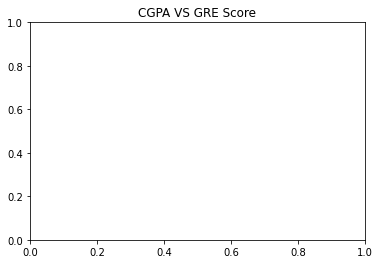

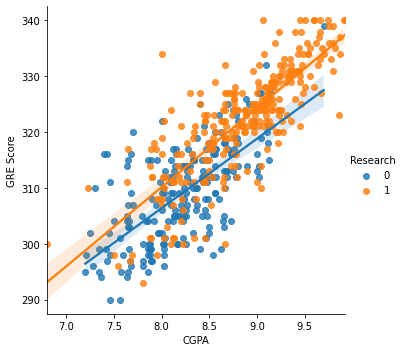

In [16]:
# A linear plot to show the relationship between the CGPA and the GRE Score with a hue of Research
plt.title("CGPA VS GRE Score")
sns.lmplot(x ="CGPA", y = 'GRE Score', data = df, hue = "Research")

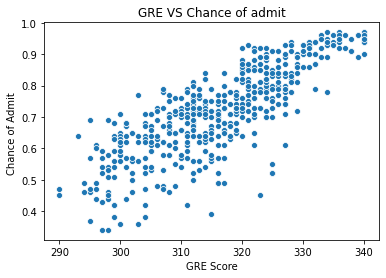

In [17]:
# A scatter plot to show the relationship between the GRE Score and the chances of getting admission
plt.title("GRE VS Chance of admit")
sns.scatterplot(x = "GRE Score", y = 'Chance of Admit ', data = df)

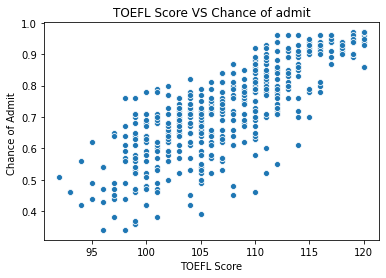

In [18]:
# A scatter plot to show the relationship between the TOEFL Score and the chances of getting admission

plt.title("TOEFL Score VS Chance of admit")
sns.scatterplot(x = "TOEFL Score", y = 'Chance of Admit ', data = df, )

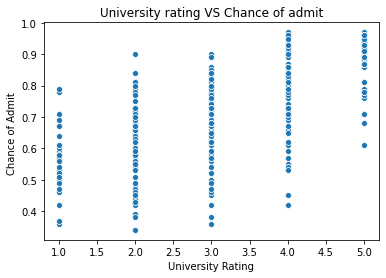

In [19]:
# A scatter plot to show the relationship between the University rating and the chances of getting admission

plt.title("University rating VS Chance of admit")
sns.scatterplot(x = "University Rating", y = 'Chance of Admit ', data = df, )

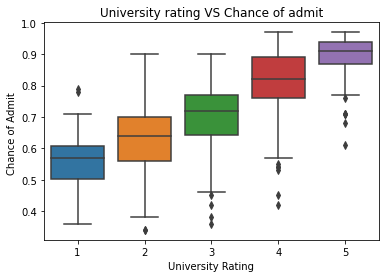

In [20]:
plt.title("University rating VS Chance of admit")
sns.boxplot(x = "University Rating", y = 'Chance of Admit ', data = df)

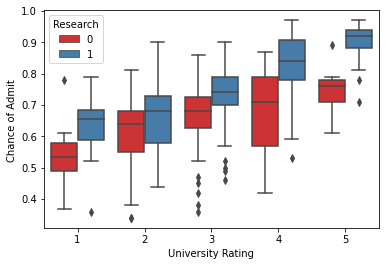

In [21]:
sns.boxplot(x = "University Rating", y = 'Chance of Admit ', data = df, hue = "Research", palette='Set1')

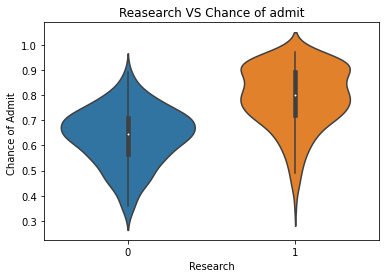

In [22]:
plt.title("Reasearch VS Chance of admit")
sns.violinplot(x = "Research", y = 'Chance of Admit ', data = df, )

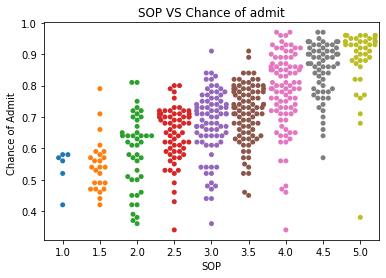

In [23]:
plt.title("SOP VS Chance of admit")
sns.swarmplot(x = "SOP", y = 'Chance of Admit ', data = df, )